<a href="https://colab.research.google.com/github/Noob919/PET-EXPERIMENT/blob/main/modified_pet_weight_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
df =  pd.read_csv("/content/MODIFIED PET MP.csv",encoding= 'utf-8')
df.columns

Index(['time', 'tem', 'heating rate', 'Weight loss', 'DTG ', 'Unnamed: 5'], dtype='object')

In [3]:
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)

,time,tem,heating rate,Weight loss,DTG,label
4024,67.05,964.81,14.38941089,68.2224429,-0.226608467,Training
4025,67.06666667,964.96,14.38807157,68.2224429,-0.098593044,Training
4026,67.08333333,965.12,14.38688199,68.2224429,-0.098570252,Training
4027,67.1,965.29,14.38584203,68.2224429,-0.098546047,Test
4028,67.11666667,965.43,14.3843556,68.2224429,-0.098526122,Training


In [4]:
df_res =  df_na[['time', 'tem', 'heating rate', 'Weight loss']]
df_res.tail(3)

,time,tem,heating rate,Weight loss
4026,67.08333333,965.12,14.38688199,68.2224429
4027,67.1,965.29,14.38584203,68.2224429
4028,67.11666667,965.43,14.3843556,68.2224429


In [5]:
label = df_na['label']
label = label.reset_index()
label

,index,label
0,1,Training
1,2,Test
2,3,Training
3,4,Training
4,5,Validation
...,...,...
4023,4024,Training
4024,4025,Training
4025,4026,Training
4026,4027,Test


In [6]:
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root'])
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

In [7]:
transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'Weight loss']
transform_df

,time,tem,heating rate,Weight loss
0,0.000000e+00,0.950069,0.000000,0.312040
1,9.121918e-07,0.016664,0.999846,0.005473
2,3.647085e-06,0.033313,0.999385,0.010936
3,8.199643e-06,0.049931,0.998618,0.016391
4,1.456008e-05,0.066503,0.997547,0.021829
...,...,...,...,...
4023,6.914887e-02,0.995012,0.014840,0.070358
4024,6.915534e-02,0.995012,0.014836,0.070347
4025,6.916109e-02,0.995012,0.014832,0.070335
4026,6.916613e-02,0.995013,0.014829,0.070323


In [8]:
dataframe = pd.concat([transform_df,label],axis =1)
dataframe

,time,tem,heating rate,Weight loss,index,label
0,0.000000e+00,0.950069,0.000000,0.312040,1,Training
1,9.121918e-07,0.016664,0.999846,0.005473,2,Test
2,3.647085e-06,0.033313,0.999385,0.010936,3,Training
3,8.199643e-06,0.049931,0.998618,0.016391,4,Training
4,1.456008e-05,0.066503,0.997547,0.021829,5,Validation
...,...,...,...,...,...,...
4023,6.914887e-02,0.995012,0.014840,0.070358,4024,Training
4024,6.915534e-02,0.995012,0.014836,0.070347,4025,Training
4025,6.916109e-02,0.995012,0.014832,0.070335,4026,Training
4026,6.916613e-02,0.995013,0.014829,0.070323,4027,Test


In [9]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']

In [10]:
from sklearn.tree import DecisionTreeRegressor
DTCLF = DecisionTreeRegressor()
DTCLF.fit(X,y)

DecisionTreeRegressor()

In [11]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']
predictions_val = DTCLF.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val

,0
0,0.016391
1,0.107154
2,0.176534
3,0.199537
4,0.213906
...,...
401,0.070651
402,0.070609
403,0.070575
404,0.070553


In [12]:
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 1.813213471701687e-07
RMSE 0.00042581844390557897
MAE 0.00010980835636541139
R2_Score 0.9999553721397167


In [13]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)

In [14]:
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,Weight loss
0,0.000015,0.066503,0.997547,0.016391,0.021829
1,0.000410,0.342108,0.933021,0.107154,0.111508
2,0.001133,0.536705,0.825700,0.176534,0.173681


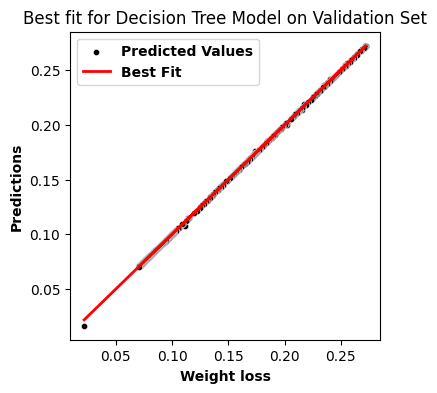

In [17]:
# Assuming final_df contains your DataFrame with columns 'Weight loss' and 'preditions'

x = final_df['Weight loss']
y = final_df['preditions']  # Corrected the column name here

a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df, x='Weight loss', y='preditions', color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='red', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Decision Tree Model on Validation Set')
plt.xlabel('Weight loss',fontsize=10, fontweight='bold')
plt.ylabel('Predictions',fontsize=10, fontweight='bold')  # Set the y-axis label to 'Predictions'
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [18]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

In [19]:
predictions_test = DTCLF.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.010936
1,0.043290
2,0.058972
3,0.098070
4,0.120098
...,...
401,0.071164
402,0.070802
403,0.070751
404,0.070751


In [20]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 3.9423144275532786e-07
RMSE 0.0006278785254771243
MAE 0.00014485851141796103
R2_Score 0.9999047436014209


In [21]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
X_test_df

,time,tem,heating rate
0,9.121918e-07,0.016664,0.999846
1,7.291845e-05,0.148165,0.987769
2,1.283030e-04,0.195713,0.978567
3,3.428455e-04,0.314557,0.943672
4,5.191274e-04,0.381633,0.915920
...,...,...,...
401,6.883534e-02,0.994973,0.015075
402,6.896480e-02,0.994992,0.014970
403,6.897134e-02,0.994992,0.014966
404,6.897715e-02,0.994993,0.014962


In [22]:
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,9.121918e-07,0.016664,0.999846,0.010936,0.005473
1,7.291845e-05,0.148165,0.987769,0.043290,0.048564
2,1.283030e-04,0.195713,0.978567,0.058972,0.064056
3,3.428455e-04,0.314557,0.943672,0.098070,0.102649
4,5.191274e-04,0.381633,0.915920,0.120098,0.124281
...,...,...,...,...,...
401,6.883534e-02,0.994973,0.015075,0.071164,0.071153
402,6.896480e-02,0.994992,0.014970,0.070802,0.070787
403,6.897134e-02,0.994992,0.014966,0.070751,0.070776
404,6.897715e-02,0.994993,0.014962,0.070751,0.070764


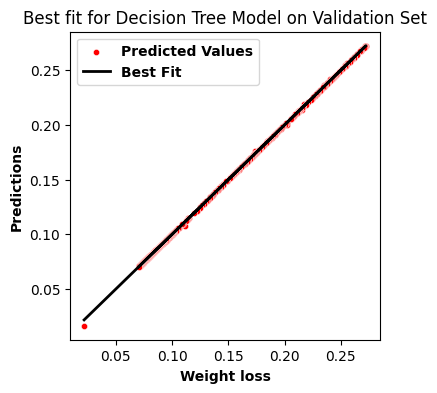

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_df contains your DataFrame with columns 'Weight loss' and 'preditions'

x = final_df['Weight loss']
y = final_df['preditions']  # Corrected the column name here

a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df, x='Weight loss', y='preditions', color='red', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='black', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Decision Tree Model on Validation Set')
plt.xlabel('Weight loss',fontsize=10, fontweight='bold')
plt.ylabel('Predictions',fontsize=10, fontweight='bold')  # Set the y-axis label to 'Predictions'
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rfc = RandomForestRegressor()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']


rfc.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']

predictions_val = rfc.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 3.015065785134414e-08
RMSE 0.00017363944785487006
MAE 4.715447752226881e-05
R2_Score 0.9999925791454396


In [27]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,Weight loss
0,0.000015,0.066503,0.997547,0.020674,0.021829
1,0.000410,0.342108,0.933021,0.110209,0.111508
2,0.001133,0.536705,0.825700,0.175875,0.173681


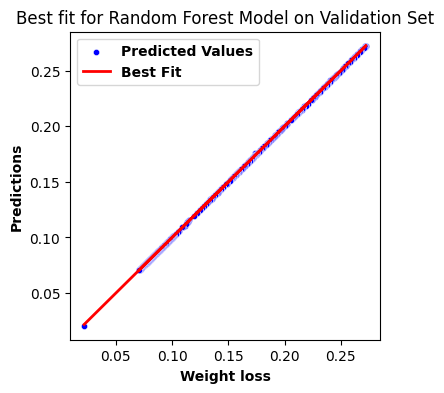

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_df contains your DataFrame with columns 'Weight loss' and 'preditions'

x = final_df['Weight loss']
y = final_df['preditions']

# Calculate the best-fit line coefficients
a, b = np.polyfit(x, y, 1)

# Create a figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df, x='Weight loss', y='preditions', color='blue', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='red', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Random Forest Model on Validation Set')
plt.xlabel('Weight loss',fontsize=10, fontweight='bold')
plt.ylabel('Predictions',fontsize=10, fontweight='bold')  # Set the y-axis label to 'Predictions'
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()


In [29]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

predictions_test = rfc.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 2.2542466465509602e-07
RMSE 0.00047478907385816707
MAE 6.95888410650107e-05
R2_Score 0.9999455316360464


In [30]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,9.121918e-07,0.016664,0.999846,0.014253,0.005473
1,7.291845e-05,0.148165,0.987769,0.047322,0.048564
2,1.283030e-04,0.195713,0.978567,0.062707,0.064056
3,3.428455e-04,0.314557,0.943672,0.100777,0.102649
4,5.191274e-04,0.381633,0.915920,0.122614,0.124281
...,...,...,...,...,...
401,6.883534e-02,0.994973,0.015075,0.071153,0.071153
402,6.896480e-02,0.994992,0.014970,0.070804,0.070787
403,6.897134e-02,0.994992,0.014966,0.070771,0.070776
404,6.897715e-02,0.994993,0.014962,0.070748,0.070764


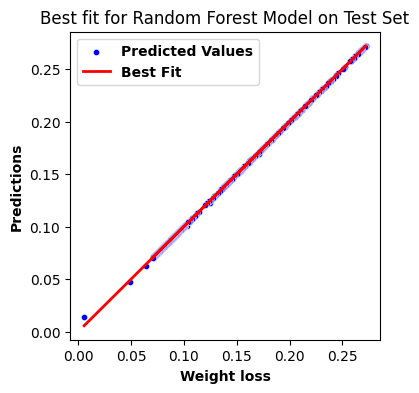

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_df_test contains your DataFrame with columns 'Weight loss' and 'predictions_test'

x = final_df_test['Weight loss']
y = final_df_test['predictions_test']

# Calculate the best-fit line coefficients
a, b = np.polyfit(x, y, 1)

# Create a figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df_test, x='Weight loss', y='predictions_test', color='blue', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='red', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Random Forest Model on Test Set')
plt.xlabel('Weight loss',fontsize=10, fontweight='bold')
plt.ylabel('Predictions',fontsize=10, fontweight='bold')  # Set the y-axis label to 'Predictions'
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()


In [33]:
from sklearn.svm import SVR

svr = SVR()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']

svr.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']

predictions_val = svr.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 0.004476731964112078
RMSE 0.06690838485654901
MAE 0.058441081779975444
R2_Score -0.10183920281859282


In [34]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,Weight loss
0,0.000015,0.066503,0.997547,0.111451,0.021829
1,0.000410,0.342108,0.933021,0.122611,0.111508
2,0.001133,0.536705,0.825700,0.136877,0.173681


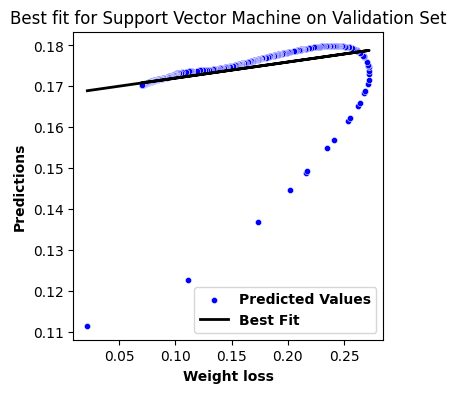

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_df contains your DataFrame with columns 'Weight loss' and 'preditions'

x = final_df['Weight loss']
y = final_df['preditions']

# Calculate the best-fit line coefficients
a, b = np.polyfit(x, y, 1)

# Create a figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df, x='Weight loss', y='preditions', color='blue', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='black', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Support Vector Machine on Validation Set')
plt.xlabel('Weight loss',fontsize=10, fontweight='bold')
plt.ylabel('Predictions',fontsize=10, fontweight='bold')  # Set the y-axis label to 'Predictions'
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [37]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

predictions_test = svr.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 0.004652551055625118
RMSE 0.06820961116752622
MAE 0.06011562123273351
R2_Score -0.12417531860637077


In [38]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,9.121918e-07,0.016664,0.999846,0.110745,0.005473
1,7.291845e-05,0.148165,0.987769,0.113489,0.048564
2,1.283030e-04,0.195713,0.978567,0.115180,0.064056
3,3.428455e-04,0.314557,0.943672,0.120969,0.102649
4,5.191274e-04,0.381633,0.915920,0.125148,0.124281
...,...,...,...,...,...
401,6.883534e-02,0.994973,0.015075,0.170385,0.071153
402,6.896480e-02,0.994992,0.014970,0.170357,0.070787
403,6.897134e-02,0.994992,0.014966,0.170356,0.070776
404,6.897715e-02,0.994993,0.014962,0.170355,0.070764


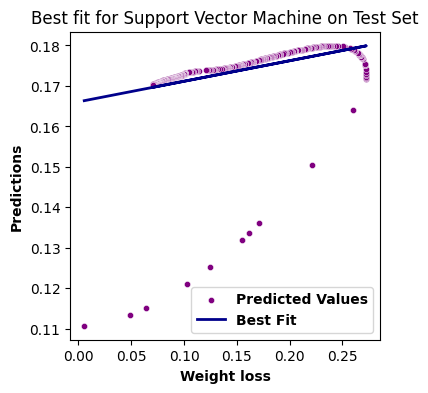

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_df_test contains your DataFrame with columns 'Weight loss' and 'predictions_test'

x = final_df_test['Weight loss']
y = final_df_test['predictions_test']

# Calculate the best-fit line coefficients
a, b = np.polyfit(x, y, 1)

# Create a figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df_test, x='Weight loss', y='predictions_test', color='purple', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='darkblue', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Support Vector Machine on Test Set')
plt.xlabel('Weight loss',fontsize=10, fontweight='bold')
plt.ylabel('Predictions',fontsize=10, fontweight='bold')  # Set the y-axis label to 'Predictions'
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()